In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.optimize as sco


color=["#96D3F2","#AC89D6","#C7D99C","#FFBAF7"]


osc="KPO"

resultados=[]
resultados_std=[]
resultados_f=[]

archivos=["tiempo_2.csv","tiempo_3.csv","tiempo_4.csv","tiempo_5.csv"]

for nombre in archivos:
    resultados.append(pd.read_csv(osc+"/"+nombre,header=None,index_col=False))
    resultados_f=resultados[-1].sort_values(by=0,ascending=True)
    grp = np.arange(len(resultados_f)) // 3
    resultados[-1]=resultados_f.groupby(grp).mean(numeric_only=True).reset_index(drop=True)
    resultados_std.append(resultados_f.groupby(grp).std(numeric_only=True).reset_index(drop=True))

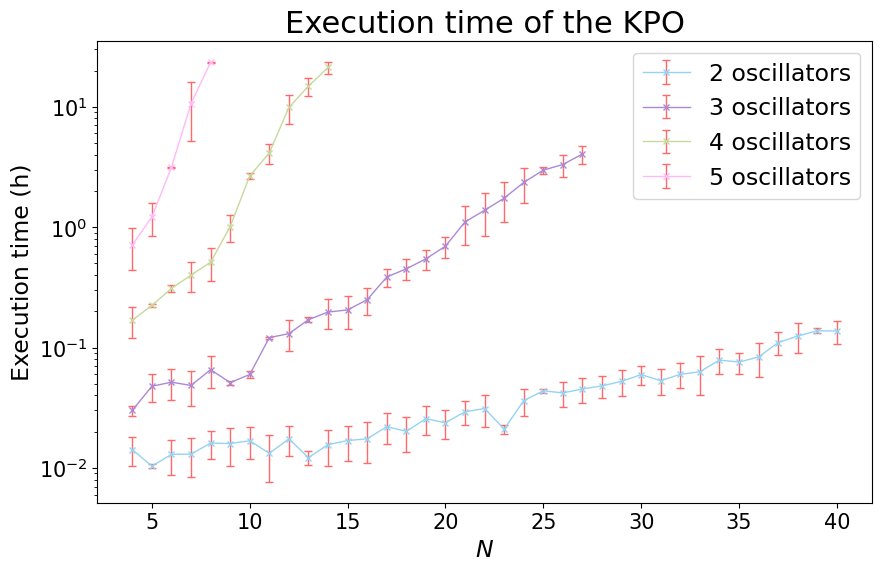

In [107]:
plt.figure(1,figsize=(10,6))

plt.title(r"Execution time of the KPO",fontsize=22)


for i in range(len(resultados)):
    plt.errorbar(resultados[i].loc[:,0]**(1/(2+i)),resultados[i].loc[:,3]/3600,yerr=resultados_std[i].loc[:,3]/3600,color=color[i],marker="x",markersize=4,ecolor="#FF6969",capsize=3,linewidth=1,elinewidth=1,label=str(2+i)+" oscillators")


plt.legend(loc="upper right",fontsize=17)

plt.xlabel(r"$N$",fontsize=17)
plt.ylabel(r"Execution time (h)",fontsize=17)

#plt.xscale("log")
plt.yscale("log")


#plt.xlim(10,7*10**4)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


#plt.xlim(10,7*10**4)

plt.savefig("execution_KPO.png",format="png",bbox_inches="tight")


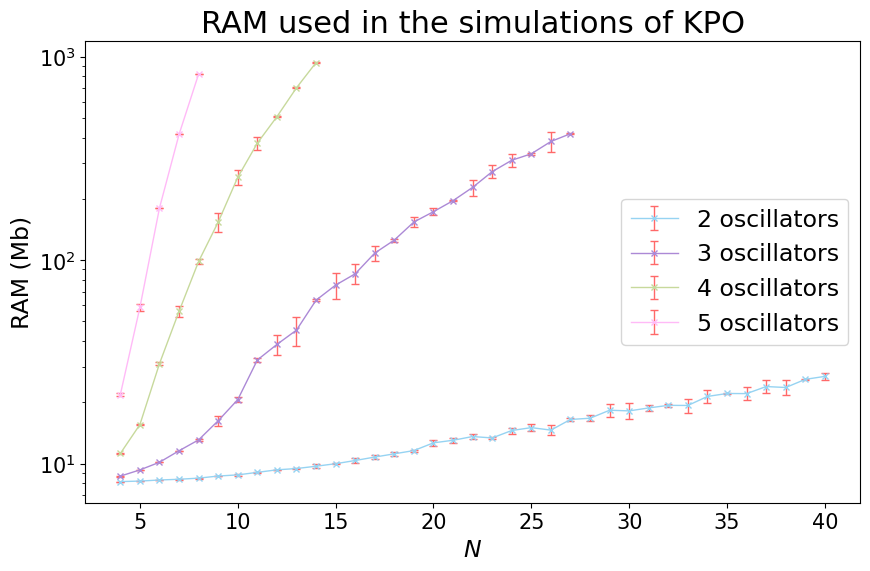

In [108]:
plt.figure(1,figsize=(10,6))

plt.title(r"RAM used in the simulations of KPO",fontsize=22)


for i in range(len(resultados)):
    plt.errorbar(resultados[i].loc[:,0]**(1/(2+i)),resultados[i].loc[:,5],yerr=resultados_std[i].loc[:,5],color=color[i],marker="x",markersize=4,ecolor="#FF6969",capsize=3,linewidth=1,elinewidth=1,label=str(2+i)+" oscillators")


plt.legend(loc="center right",fontsize=17)

plt.xlabel(r"$N$",fontsize=17)
plt.ylabel(r"RAM (Mb)",fontsize=17)

#plt.xscale("log")
plt.yscale("log")

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


#plt.xlim(10,7*10**4)

plt.savefig("RAM_KPO.png",format="png",bbox_inches="tight")

In [109]:
coeft=[]
errt=[]
rt=[]

coefm=[]
errm=[]
rm=[]


for i in range(len(resultados)):
    coef,cov=sco.curve_fit(f,resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,3]/3600),p0=[0.0,0.0])
    r=np.corrcoef(resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,3]/3600))
    err=np.sqrt(np.diag(cov))

    coeft.append(coef)
    errt.append(err)
    rt.append(r)

    coef,cov=sco.curve_fit(f,resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,5]),p0=[0.0,0.0])

    err=np.sqrt(np.diag(cov))
    
    r=np.corrcoef(resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,5]))


    coefm.append(coef)
    errm.append(err)
    rm.append(r)

In [110]:
N=16
f=lambda x,a,b:a*x+b
for i in range(len(resultados)):
    print("--------------------------RAM n="+str(2+i)+"--------------------------")

    
    print("coef a: ",coefm[i][0],r" \pm ",errm[i][0])
    print("coef b: ",coefm[i][1],r" \pm ",errm[i][1])
    print("r^2",rm[i][0,1])
    print("Required RAM N="+str(N)+": ",np.exp(f(N,coefm[i][0],coefm[i][1]))/1024,r"\pm ",np.exp(f(N,coefm[i][0],coeft[i][1]))*np.sqrt(N*errm[i][0]**2+errm[i][1]**2)/1024)

--------------------------RAM n=2--------------------------
coef a:  0.035038254140116395  \pm  0.0007066646286083683
coef b:  1.8397005067034513  \pm  0.01728080409383583
r^2 0.9929567577033038
Required RAM N=16:  0.010768186001853579 \pm  2.1311083956741817e-07
--------------------------RAM n=3--------------------------
coef a:  0.18493480939270138  \pm  0.0048905076947666016
coef b:  1.3401724012801817  \pm  0.08301867897746962
r^2 0.9923952125204429
Required RAM N=16:  0.0719098193502034 \pm  1.6444975260563365e-05
--------------------------RAM n=4--------------------------
coef a:  0.45882430620018744  \pm  0.019240643466078323
coef b:  0.7199637244388725  \pm  0.1835440394948784
r^2 0.9921793865544275
Required RAM N=16:  3.0946685800945155 \pm  0.004003051682579137
--------------------------RAM n=5--------------------------
coef a:  0.920640006731989  \pm  0.0485153008347389
coef b:  -0.5061429992442618  \pm  0.2990683863464399
r^2 0.9958603309243672
Required RAM N=16:  1469.4233

In [111]:
f=lambda x,a,b:a*x+b
for i in range(len(resultados)):
    print("--------------------------Time n="+str(2+i)+"--------------------------")

    
    print("coef a: ",coeft[i][0],r" \pm ",errt[i][0])
    print("coef b: ",coeft[i][1],r" \pm ",errt[i][1])
    print("r^2",rt[i][0,1])
    print("Required time N="+str(N)+": ",np.exp(f(N,coeft[i][0],coeft[i][1])),r"\pm ",np.exp(f(N,coeft[i][0],coeft[i][1]))*np.sqrt(N*errt[i][0]**2+errt[i][1]**2))

--------------------------Time n=2--------------------------
coef a:  0.06898839511892794  \pm  0.0028558110229427477
coef b:  -4.945636797221604  \pm  0.06983611234807365
r^2 0.971297023444518
Required time N=16:  0.021454465460051798 \pm  0.001518208250220497
--------------------------Time n=3--------------------------
coef a:  0.21822784309016935  \pm  0.006451754307736224
coef b:  -4.581304468912212  \pm  0.10952157751392515
r^2 0.9905219446962201
Required time N=16:  0.3363311699861506 \pm  0.0378443235213144
--------------------------Time n=4--------------------------
coef a:  0.5241807897091986  \pm  0.030195055273750552
coef b:  -4.316099403557585  \pm  0.288042470704482
r^2 0.9853942039680256
Required time N=16:  58.603430263502844 \pm  18.304200205872014
--------------------------Time n=5--------------------------
coef a:  0.9162566702245478  \pm  0.06264910851628096
coef b:  -4.194690743051395  \pm  0.38619504196579146
r^2 0.9930601916258706
Required time N=16:  35081.036069

In [112]:
N=14
f=lambda x,a,b:a*x+b

coef,cov=sco.curve_fit(f,resultados[-1].loc[:,0]**(1/(5)),np.log(resultados[-1].loc[:,3]/3600),p0=[0.0,0.0])

err=np.sqrt(np.diag(cov))

r=np.corrcoef(resultados[-1].loc[:,0]**(1/(5)),np.log(resultados[-1].loc[:,3]/3600))

print("coef a: ",coef[0],r" \pm ",err[0])
print("coef b: ",coef[1],r" \pm ",err[1])
print("r^2",r[0,1])
print("Required time N="+str(N)+": ",np.exp(f(N,coef[0],coef[1])),r"\pm ",np.exp(f(N,coef[0],coef[1]))*np.sqrt(N*err[0]**2+err[1]**2))

coef a:  0.9162566702245478  \pm  0.06264910851628096
coef b:  -4.194690743051395  \pm  0.38619504196579146
r^2 0.9930601916258706
Required time N=14:  5613.348157964542 \pm  2535.937505585519


In [113]:

f=lambda x,a,b:a*x+b

coef,cov=sco.curve_fit(f,resultados[-2].loc[:,0]**(1/(4)),np.log(resultados[-2].loc[:,5]),p0=[0.0,0.0])

err=np.sqrt(np.diag(cov))

r=np.corrcoef(resultados[-2].loc[:,0]**(1/(4)),np.log(resultados[-2].loc[:,5]))

print("coef a: ",coef[0],r" \pm ",err[0])
print("coef b: ",coef[1],r" \pm ",err[1])
print("r^2",r[0,1])
print("Required RAM N="+str(N)+": ",np.exp(f(N,coef[0],coef[1]))/1024,r"\pm ",np.exp(f(N,coef[0],coef[1]))*np.sqrt(N*err[0]**2+err[1]**2)/1024)

coef a:  0.45882430620018744  \pm  0.019240643466078323
coef b:  0.7199637244388725  \pm  0.1835440394948784
r^2 0.9921793865544275
Required RAM N=14:  1.2361876966558785 \pm  0.2437242014892877


In [114]:
osc="disipativos"

resultados=[]
resultados_std=[]
resultados_f=[]

archivos=["tiempo_2.csv","tiempo_3.csv","tiempo_4.csv"]

for nombre in archivos:
    resultados.append(pd.read_csv(osc+"/"+nombre,header=None,index_col=False))
    resultados_f=resultados[-1].sort_values(by=0,ascending=True)
    grp = np.arange(len(resultados_f)) // 3
    resultados[-1]=resultados_f.groupby(grp).mean(numeric_only=True).reset_index(drop=True)
    resultados_std.append(resultados_f.groupby(grp).std(numeric_only=True).reset_index(drop=True))

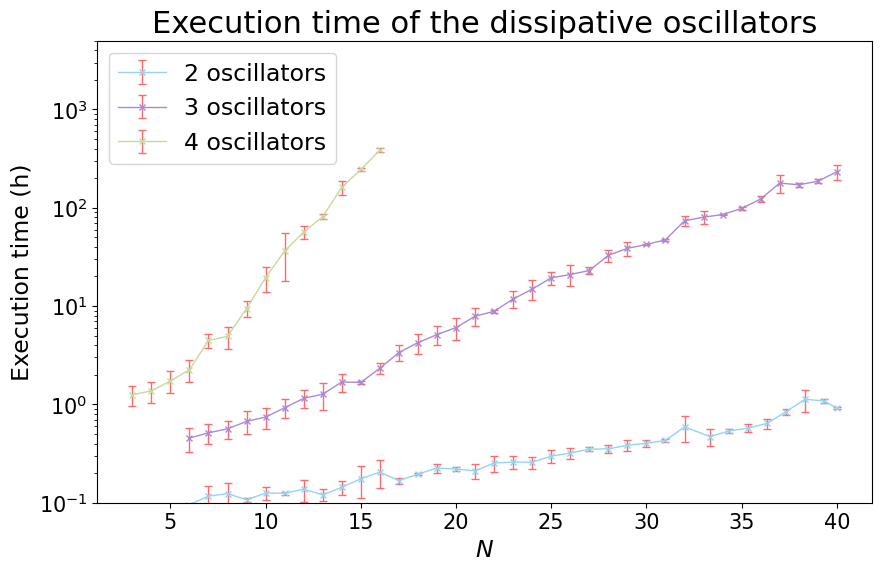

In [115]:
plt.figure(1,figsize=(10,6))

plt.title(r"Execution time of the dissipative oscillators",fontsize=22)


for i in range(len(resultados)):
    plt.errorbar((resultados[i].loc[:,0])**(1/(2.0+i)),resultados[i].loc[:,3]/180,yerr=resultados_std[i].loc[:,3]/180,color=color[i],marker="x",markersize=4,ecolor="#FF6969",capsize=3,linewidth=1,elinewidth=1,label=str(2+i)+" oscillators")


plt.legend(loc="upper left",fontsize=17)

plt.xlabel(r"$N$",fontsize=17)
plt.ylabel(r"Execution time (h)",fontsize=17)

#plt.xscale("log")
plt.yscale("log")

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylim(0.1,5*10**3)

plt.savefig("execution_disp.png",format="png",bbox_inches="tight")

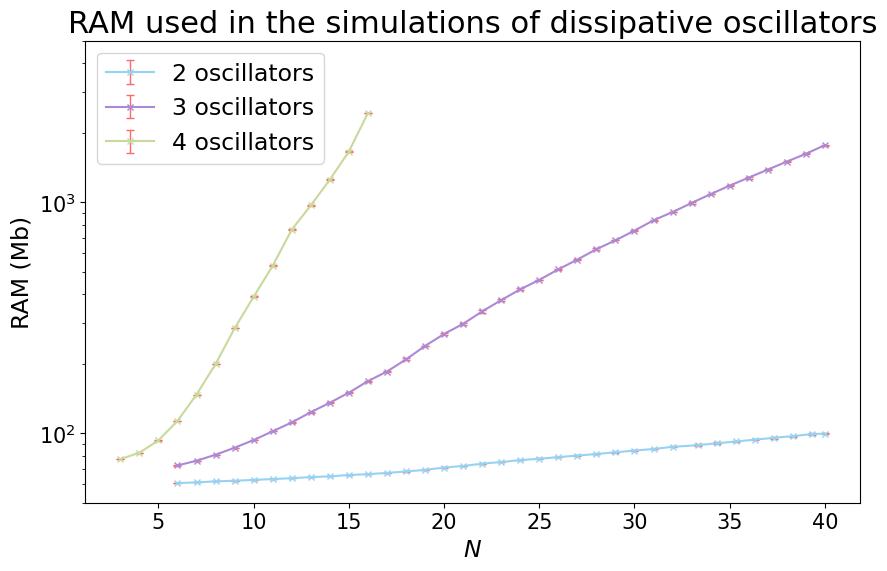

In [116]:
plt.figure(1,figsize=(10,6))

plt.title(r"RAM used in the simulations of dissipative oscillators",fontsize=22)


for i in range(len(resultados)):
    plt.errorbar(resultados[i].loc[:,0]**(1/(2+i)),resultados[i].loc[:,5]/(5),yerr=resultados_std[i].loc[:,5]/(5),color=color[i],marker="x",markersize=4,ecolor="#FF6969",capsize=3,linewidth=1.5,elinewidth=1,label=str(2+i)+" oscillators")


plt.legend(loc="upper left",fontsize=17)

plt.xlabel(r"$N$",fontsize=17)
plt.ylabel(r"RAM (Mb)",fontsize=17)


plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.xscale("log")
plt.yscale("log")

plt.ylim(50,5*10**3)
#plt.xlim(20,7*10**4)

plt.savefig("RAM_disp.png",format="png",bbox_inches="tight")

In [117]:
coeft=[]
errt=[]
rt=[]

coefm=[]
errm=[]
rm=[]


for i in range(len(resultados)):
    coef,cov=sco.curve_fit(f,resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,3]/3600),p0=[0.0,0.0])
    r=np.corrcoef(resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,3]/3600))
    err=np.sqrt(np.diag(cov))

    coeft.append(coef)
    errt.append(err)
    rt.append(r)

    coef,cov=sco.curve_fit(f,resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,5]),p0=[0.0,0.0])

    err=np.sqrt(np.diag(cov))
    
    r=np.corrcoef(resultados[i].loc[:,0]**(1/(2+i)),np.log(resultados[i].loc[:,5]))


    coefm.append(coef)
    errm.append(err)
    rm.append(r)

In [120]:
N=30
f=lambda x,a,b:a*x+b
for i in range(len(resultados)):
    print("--------------------------RAM n="+str(2+i)+"--------------------------")

    
    print("coef a: ",coefm[i][0],r" \pm ",errm[i][0])
    print("coef b: ",coefm[i][1],r" \pm ",errm[i][1])
    print("r^2",rm[i][0,1])
    print("Required RAM N="+str(N)+": ",np.exp(f(N,coefm[i][0],coefm[i][1]))/1024,r"\pm ",np.exp(f(N,coefm[i][0],coeft[i][1]))*np.sqrt(N*errm[i][0]**2+errm[i][1]**2)/1024)

--------------------------RAM n=2--------------------------
coef a:  0.015310322212119098  \pm  0.00028076494367283277
coef b:  5.58385653873803  \pm  0.007079880257030417
r^2 0.994496935599944
Required RAM N=30:  0.41135215748266385 \pm  3.359958116432039e-08
--------------------------RAM n=3--------------------------
coef a:  0.09981131651905512  \pm  0.0009238197386390014
coef b:  5.189912330772393  \pm  0.02320608696840462
r^2 0.9985894801122274
Required RAM N=30:  3.5000596833811577 \pm  2.8012808887726117e-06
--------------------------RAM n=4--------------------------
coef a:  0.2807984013451984  \pm  0.008689487634243096
coef b:  4.802029730076347  \pm  0.08967450237689427
r^2 0.9943032540227318
Required RAM N=30:  541.5903830213404 \pm  0.0038909903327963616


In [121]:
f=lambda x,a,b:a*x+b
for i in range(len(resultados)):
    print("--------------------------Time n="+str(2+i)+"--------------------------")

    
    print("coef a: ",coeft[i][0],r" \pm ",errt[i][0])
    print("coef b: ",coeft[i][1],r" \pm ",errt[i][1])
    print("r^2",rt[i][0,1])
    print("Required time N="+str(N)+": ",np.exp(f(N,coeft[i][0],coeft[i][1])),r"\pm ",np.exp(f(N,coeft[i][0],coeft[i][1]))*np.sqrt(N*errt[i][0]**2+errt[i][1]**2))

--------------------------Time n=2--------------------------
coef a:  0.06682593297787669  \pm  0.0021818199181082207
coef b:  -5.80914208794696  \pm  0.05501763646987091
r^2 0.9828622252900389
Required time N=30:  0.022273356321897014 \pm  0.0012540019218920092
--------------------------Time n=3--------------------------
coef a:  0.19420195195345344  \pm  0.0021832606174302755
coef b:  -5.108184798490627  \pm  0.054842880897055316
r^2 0.9979211076292246
Required time N=30:  2.0500696334560633 \pm  0.1150733941598706
--------------------------Time n=4--------------------------
coef a:  0.47663162644970547  \pm  0.0170553600742829
coef b:  -4.754092813230124  \pm  0.17600933284654707
r^2 0.9924048304690721
Required time N=30:  13972.633984582295 \pm  2784.232517254495
